In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import scipy
import cv2
import os
print("Module Imported")

Module Imported


In [4]:
train=ImageDataGenerator(rescale=1/125)
validation=ImageDataGenerator(rescale=1/125)

In [5]:
train_dataset=train.flow_from_directory('basedata/train/',target_size=(200,200),batch_size=3,class_mode='binary')
validation_dataset=validation.flow_from_directory('basedata/Validation/',target_size=(200,200),batch_size=3,class_mode='binary')

Found 30 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [6]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  ##
                                  tf.keras.layers.Flatten(),
                                  ##
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  ##
                                  tf.keras.layers.Dense(1,activation='sigmoid'),
                                 ])

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [8]:
fitmodel=model.fit(train_dataset,steps_per_epoch=3,epochs=30,validation_data=validation_dataset)

Epoch 1/30
3/3 [==============================] - 3s 684ms/step - loss: 25.7810 - accuracy: 0.4444 - val_loss: 10.2346 - val_accuracy: 0.6667
Epoch 2/30
3/3 [==============================] - 1s 493ms/step - loss: 6.6776 - accuracy: 0.6667 - val_loss: 2.0641 - val_accuracy: 0.3333
Epoch 3/30
3/3 [==============================] - 1s 480ms/step - loss: 0.8950 - accuracy: 0.6667 - val_loss: 3.2732 - val_accuracy: 0.3333
Epoch 4/30
3/3 [==============================] - 1s 477ms/step - loss: 2.5245 - accuracy: 0.4444 - val_loss: 0.5167 - val_accuracy: 0.8667
Epoch 5/30
3/3 [==============================] - 1s 465ms/step - loss: 0.4614 - accuracy: 0.7778 - val_loss: 0.5220 - val_accuracy: 0.6667
Epoch 6/30
3/3 [==============================] - 1s 470ms/step - loss: 0.6356 - accuracy: 0.6667 - val_loss: 0.5224 - val_accuracy: 0.8667
Epoch 7/30
3/3 [==============================] - 1s 508ms/step - loss: 0.5933 - accuracy: 0.7778 - val_loss: 0.4215 - val_accuracy: 0.8667
Epoch 8/30
3/3 [==

Image downloaded successfully and saved at: downloaded_image.jpg
1/1 [==============================] - 0s 47ms/step
This is dog


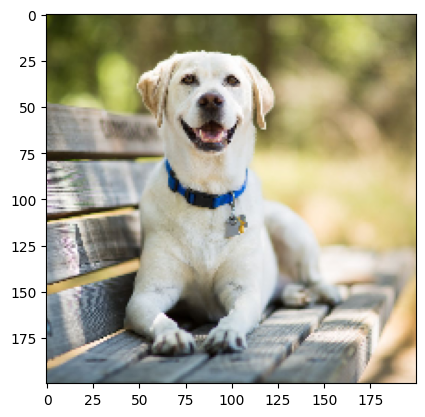

In [14]:
import requests

def download_image(url, save_path):
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Save the content to a file
        with open(save_path, 'wb') as file:
            file.write(response.content)
        print(f"Image downloaded successfully and saved at: {save_path}")
    else:
        print(f"Failed to download image. Status code: {response.status_code}")

# Example usage:
image_url = 'https://hips.hearstapps.com/ghk.h-cdn.co/assets/16/08/gettyimages-530330473.jpg?crop=0.659xw:0.990xh;0.123xw,0.00779xh&resize=980:*'  # Replace with the actual URL of the image
save_path = 'downloaded_image.jpg'  # Specify the path where you want to save the downloaded image

download_image(image_url, save_path)


img=image.load_img('downloaded_image.jpg',target_size=(200,200))
X=image.img_to_array(img)
X=np.expand_dims(X,axis=0)
images=np.vstack([X])
val=model.predict(images)
if(val==0):
    print("This is dog")
else:
    print("This is person")

plt.imshow(img)